In [9]:

import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',category=DeprecationWarning)

#Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

READING THE FILE


In [13]:
data = pd.read_csv("titanic_train.csv")
data.columns = [c.lower() for c in data.columns]
y = data.survived

In [14]:
cat_cols = list(data.select_dtypes(include=['object']).columns)
num_cols = list(data.select_dtypes(exclude=['object']).columns)
print('Numberic Columns:', num_cols)
print('Categorical columns:',cat_cols)

Numberic Columns: ['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical columns: ['name', 'sex', 'ticket', 'cabin', 'embarked']


In [15]:
nunique = data.nunique(dropna = False)
nunique

passengerid    891
survived         2
pclass           3
name           891
sex              2
age             89
sibsp            7
parch            7
ticket         681
fare           248
cabin          148
embarked         4
dtype: int64

In [16]:
data.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [17]:
data.sample(5)

passengerid  survived  pclass  \
304          305         0       3   
87            88         0       3   
271          272         1       3   
801          802         1       2   
869          870         1       3   

                                            name     sex   age  sibsp  parch  \
304            Williams, Mr. Howard Hugh "Harry"    male   NaN      0      0   
87                 Slocovski, Mr. Selman Francis    male   NaN      0      0   
271                 Tornquist, Mr. William Henry    male  25.0      0      0   
801  Collyer, Mrs. Harvey (Charlotte Annie Tate)  female  31.0      1      1   
869              Johnson, Master. Harold Theodor    male   4.0      1      1   

              ticket     fare cabin embarked  
304         A/5 2466   8.0500   NaN        S  
87   SOTON/OQ 392086   8.0500   NaN        S  
271             LINE   0.0000   NaN        S  
801       C.A. 31921  26.2500   NaN        S  
869           347742  11.1333   NaN        S

In [18]:
print(f'The size of the train dataset is {data.shape}')

The size of the train dataset is (891, 12)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Total   Percent
cabin       687  0.771044
age         177  0.198653
embarked      2  0.002245
fare          0  0.000000
ticket        0  0.000000

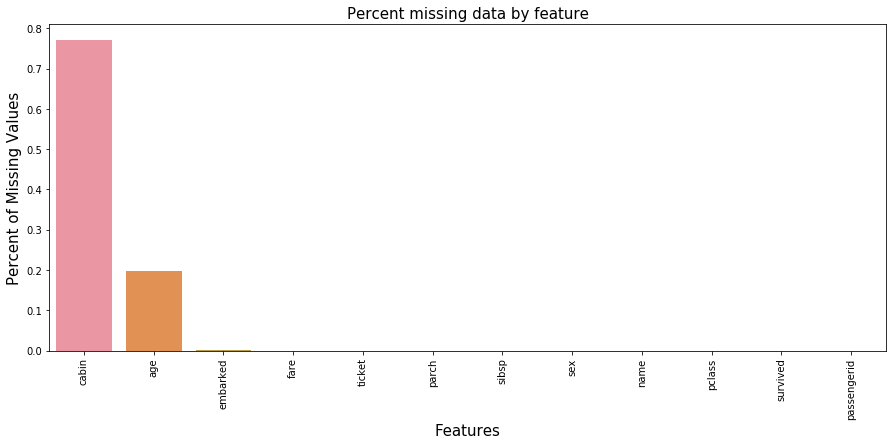

In [20]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
f, ax = plt.subplots(figsize = (15,6))
plt.xticks(rotation='90')
sns.set_context("paper")
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percent of Missing Values', fontsize = 15)
plt.title("Percent missing data by feature", fontsize=15)
missing_data.head()

In [21]:
data.describe(include='all')

passengerid    survived      pclass                  name   sex  \
count    891.000000  891.000000  891.000000                   891   891   
unique          NaN         NaN         NaN                   891     2   
top             NaN         NaN         NaN  McGovern, Miss. Mary  male   
freq            NaN         NaN         NaN                     1   577   
mean     446.000000    0.383838    2.308642                   NaN   NaN   
std      257.353842    0.486592    0.836071                   NaN   NaN   
min        1.000000    0.000000    1.000000                   NaN   NaN   
25%      223.500000    0.000000    2.000000                   NaN   NaN   
50%      446.000000    0.000000    3.000000                   NaN   NaN   
75%      668.500000    1.000000    3.000000                   NaN   NaN   
max      891.000000    1.000000    3.000000                   NaN   NaN   

               age       sibsp       parch ticket        fare    cabin  \
count   714.000000  891.000000  891.000000    891  891.000000      204   
unique         NaN         NaN         NaN    681         NaN      147   
top            NaN         NaN         NaN   1601         NaN  B96 B98   
freq           NaN         NaN         NaN      7         NaN        4   
mean     29.699118    0.523008    0.381594    NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057    NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000    NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000    NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000    NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000    NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000    NaN  512.329200      NaN   

       embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

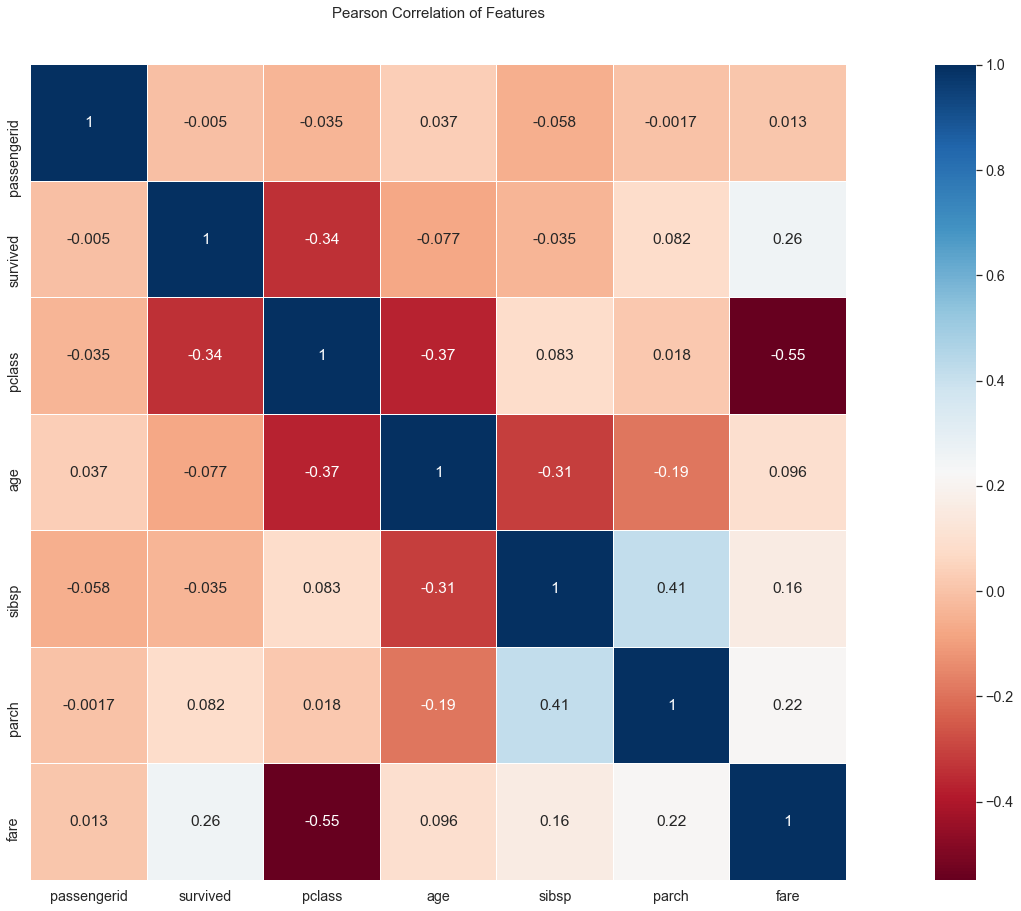

In [22]:
colormap = plt.cm.RdBu
sns.set(font_scale=1.3)
plt.figure(figsize = (32,15))
plt.title('Pearson Correlation of Features',y=1.05, size=15)
sns.heatmap(data.corr(),linewidth=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

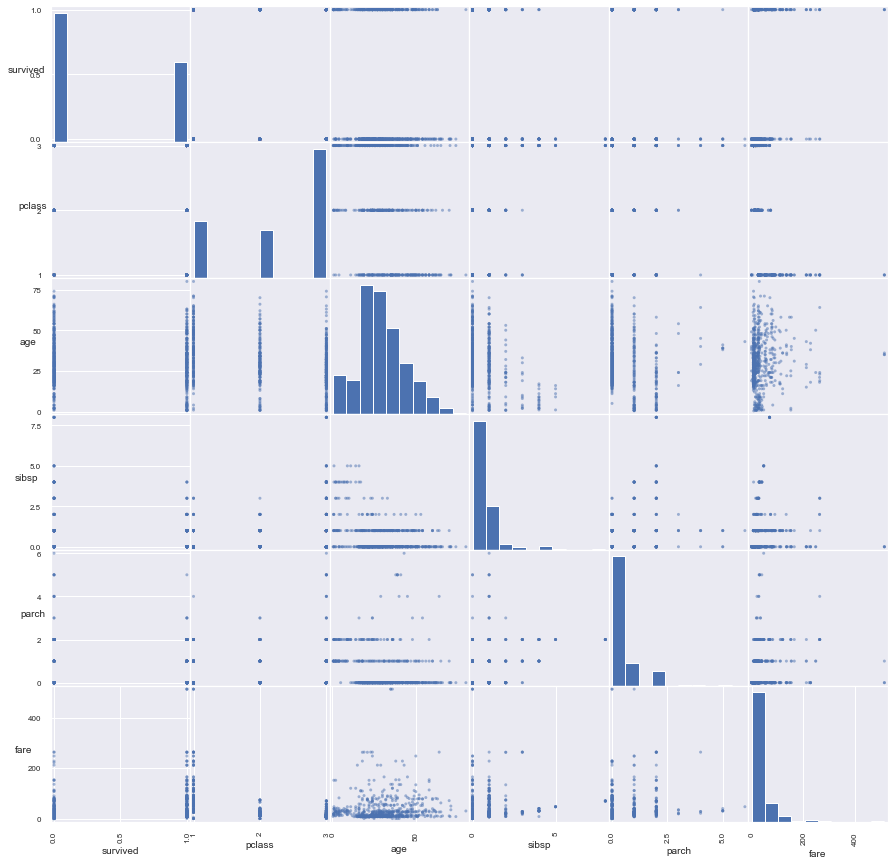

In [23]:
scatter_matrix = scatter_matrix(
    data.drop(columns='passengerid'),
    figsize  = [15, 15],
    #marker   = ".",
    #s        = 0.2,
    #diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

In [24]:
#Creating a new column "Person"
'''Some group of people like women and children are more likely to survive than others. Therefore, we are creating one more category for children'''

data['person'] = data.apply(lambda x: 'child' if x.age < 18 else x.sex, axis = 1)
print(data.person.value_counts())

#specifies the parametres of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

#Plotting many different many shaped graph together
ax1 = plt.subplot2grid((2,3),(0,0))

#BAR GRAPH
data.person.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
#Title of Bar Graph
plt.title("Distribution of Male/Female")

plt.subplot2grid((2,3),(0,1))
plt.scatter(data.survived, data.age, alpha=alpha_scatterplot)

#Y-axis Label
plt.ylabel("Age")
#the grid line style of  graphs
plt.grid(b=True, which='major', axis='y')
plt.title("Survival by Age, (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
data.pclass.value_counts().plot(kind="barh",alpha=alpha_bar_chart)
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)

#Estimation of the subset of the 1st class passanger's age
data.age[data.pclass == 1].plot(kind='kde')
data.age[data.pclass == 2].plot(kind='kde')
data.age[data.pclass == 3].plot(kind='kde')

#Plots on axis label
plt.xlabel("Age")
plt.title("Age distribution within Classes")

#Legend of Graph
plt.legend(('1st Class','2nd Class', '3rd Class'), loc='best')

ax5 = plt.subplot2grid((2,3),(1,2))
data.embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(data.embarked.value_counts()))

#Parametres of Graph
plt.title("Passengers per boarding location")

male      519
female    259
child     113
Name: person, dtype: int64


Text(0.5, 1.0, 'Passengers per boarding location')

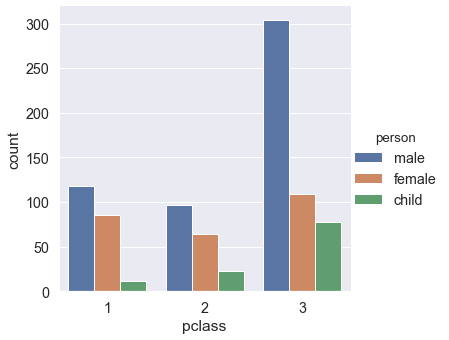

In [25]:
sns.factorplot('pclass',data=data, hue='person',kind='count')

From the observation, we can see that there more number of male passengers in the 3rd Class, than any other class. Now, lets see the age distribution of the passengers.

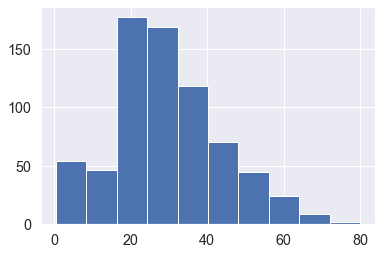

In [26]:
#Now, We can remove NaN values to get a proper plot using dropna().
#But we are not using that as for of now.
data.age.hist()

AGE DISTRIBUTION OF DIFFERENT CLASSES. (Using Facetgrid for this purpose)

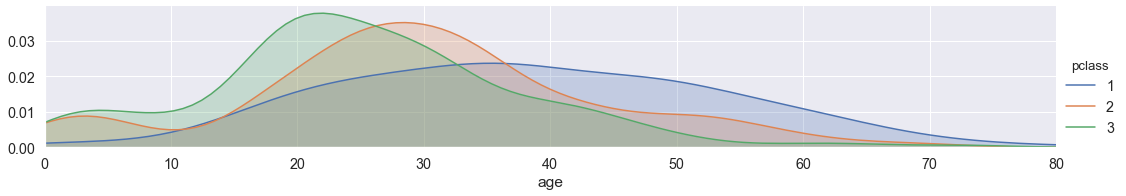

In [28]:
fig = sns.FacetGrid(data, hue='pclass',aspect=5)
fig.map(sns.kdeplot,'age',shade=True)
fig.set(xlim=(0,data.age.max()))
fig.add_legend()

Proving the previous bar chat, the first class passengers belonged more to the middle age from 20-49. While, the second and third class passengers had more children

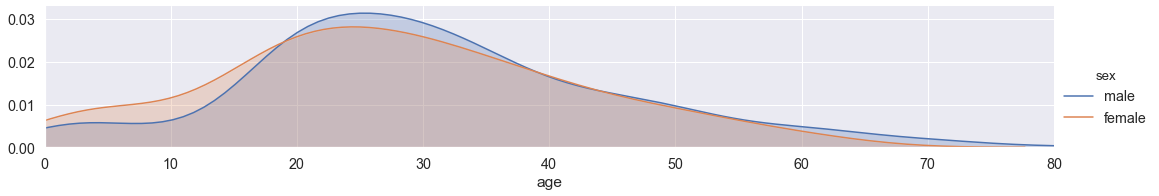

In [29]:
fig = sns.FacetGrid(data,hue='sex',aspect=5)
fig.map(sns.kdeplot,'age',shade=True)
fig.set(xlim=(0,data.age.max()))
fig.add_legend()

The age distribution seems similar for male and female passengers, though we can say that there are more younger females in the age group 0-20 and more middle aged males in age group 20-40

**SURVIVAL BASED ON THEIR CLASS AND DECK THE PASSENGERS WERE STAYING

If people belonging to higher classes were assigned cabins on a higher deck(or level of the ship).

A cabin Number of a passenger is a combination of the deck they are on. Example, a passenger on deck 'C' will have a cabin number in 'CIX' format, where IX can be a room number.

Below, created a python method to extract first character from the cabin column

In [31]:
deck_data = data[data.cabin.notnull()]
deck_data['level'] = deck_data.apply(lambda x:x.cabin[0],axis=1)
deck_data.head()

passengerid  survived  pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 name     sex   age  sibsp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    parch    ticket     fare cabin embarked  person level  
1       0  PC 17599  71.2833   C85        C  female     C  
3       0    113803  53.1000  C123        S  female     C  
6       0     17463  51.8625   E46        S    male     E  
10      1   PP 9549  16.7000    G6        S   child     G  
11      0    113783  26.5500  C103        S  female     C

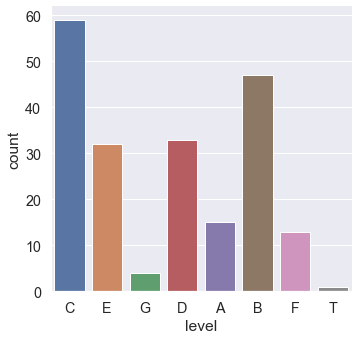

In [32]:
sns.factorplot('level',data=deck_data,kind='count')

From the above plot we can see that, Deck C was the most frequent level used.

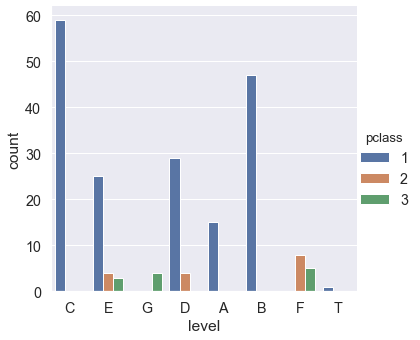

In [33]:
sns.factorplot('level',data=deck_data, hue='pclass',kind='count')

Passengers belonging to the upper classes were assigned to the Decks A,B,C. We can observe that third class passengers were only from level E.

NOTE: 3/4 of the data of the passengers cabin details were missing from the data

**PASSENGER'S EMBARKATION ANALYSIS**

There are three embarkation details as below, C = Cherbourg Q = Queenstown S = Southampton

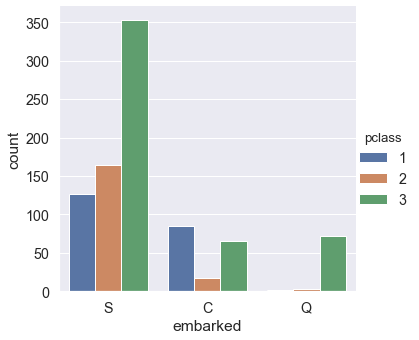

In [35]:
sns.factorplot('embarked',data=data, hue='pclass', kind='count')

Most of the passengers embarked on SouthAmpton(including Jack and Rose, in the film, although fictional). Another intersting data is that seldom first class and second class passengers embarked from Queenstown which tells us about the socio economic status of that population living there.

**FAMILY RELATIONS**

The SibsSP feature refers to the number of sibiling or spouses that a passenger had abroad.

Parch refers to the number of parents or children somone had on the ship.

Here, we are trying to know whether a passenger had someone from their family onboard or not. To make our work easy, Creating a another column name 'alone' to represent the data.

If a passenger is with someone, then data will be "Yes", else it will be "No"

In [36]:
#Adding the number of family member they had onboard.
data['alone'] = data.apply(lambda x: 'No' if x.sibsp + x.parch > 0 else 'Yes', axis=1)
data.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  person alone  
0      0         A/5 21171   7.2500   NaN        S    male    No  
1      0          PC 17599  71.2833   C85        C  female    No  
2      0  STON/O2. 3101282   7.9250   NaN        S  female   Yes  
3      0            113803  53.1000  C123        S  female    No  
4      0            373450   8.0500   NaN        S    male   Yes

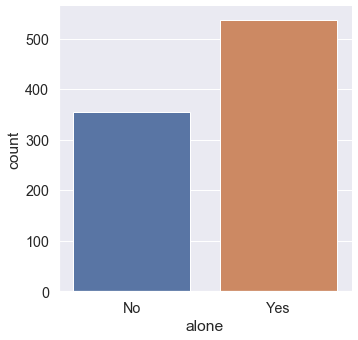

In [37]:
sns.factorplot('alone',data=data,kind='count')

Conclusion: Higher percent of people had families on board

**Conclusion: Higher percent of people had families on board**

In [40]:
print(data[['pclass','survived']].groupby('pclass').mean())
print(data[['sex','survived']].groupby('sex').mean())

        survived
pclass          
1       0.629630
2       0.472826
3       0.242363
        survived
sex             
female  0.742038
male    0.188908


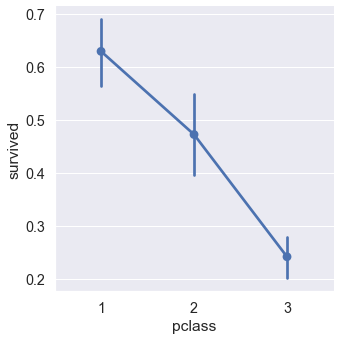

In [41]:
sns.factorplot('pclass','survived', data=data)

**OBSERVATION:** Obviously, the higher class passengers got the higher preference hence the lower chance of survival for lower class passengers.

**POINTS TO REMEMBER:**

1.In previous analysis, the data showed us that there were more men than women or children compared to the other two classes.

2.Priority to the life boats were given to the women and children.

So, now we are going to check if this was really the case because from the above chart we can see that 1st class people were given the atmost priority. By using the 'Person' column as hue, we are going to check whether it was really the case with the help of factorplot.

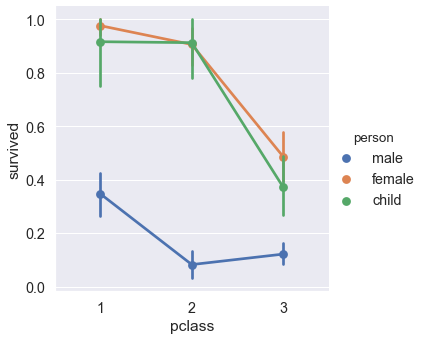

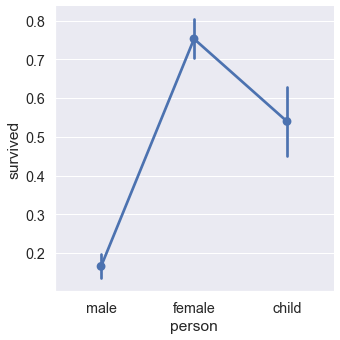

In [43]:
sns.factorplot('pclass','survived', hue='person',data=data)
sns.factorplot('person','survived',data = data)

Men had lower chances of survial than women and chidlren, as they had a lower priority of being saved. We can still genrally say that men, women and children belonging to the 3rd class had a lesser chance at survival than their counterparts belonging to the 1st class.

**ANALYSING THE RELATION BETWEEN AGE AND SURVIVAL**

Survived and dead based on age of people

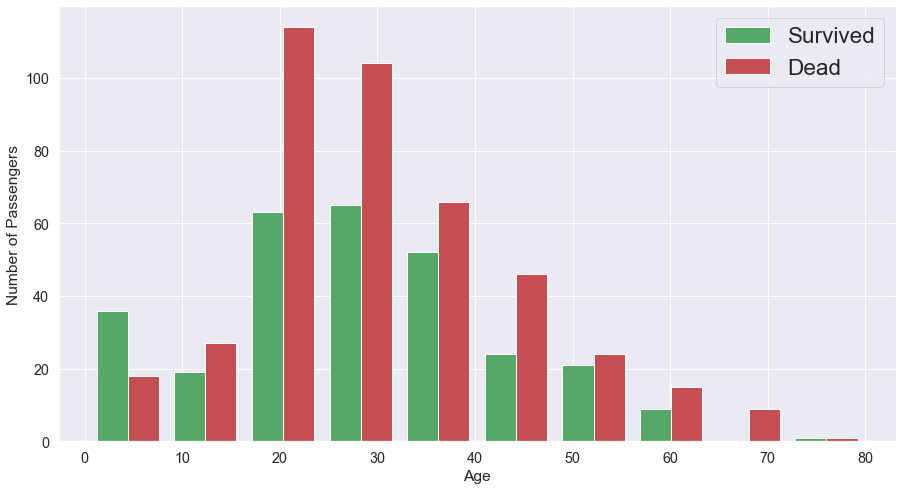

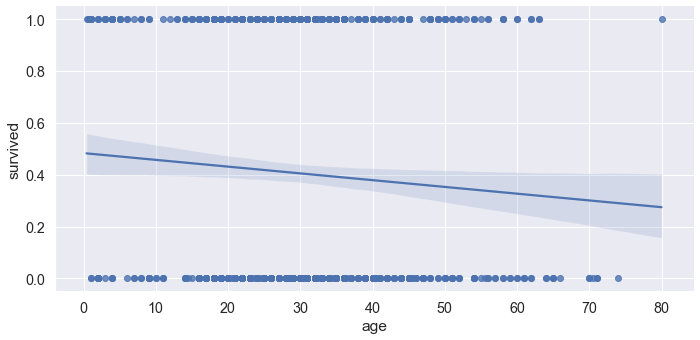

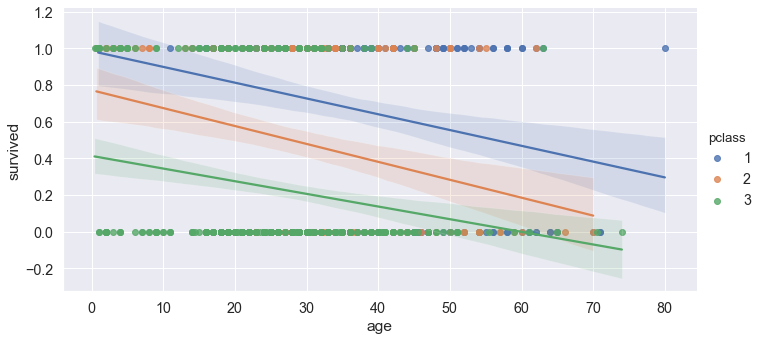

In [45]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['survived']==1]['age'].dropna(),
          data[data['survived']==0]['age'].dropna()],color=['g','r'],
          label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(fontsize = 'x-large')
sns.lmplot('age','survived',data=data,aspect=2)
sns.lmplot('age','survived',hue='pclass',data=data,aspect=2)

**The general conclusion from the above two figures seems to be that older people were less likely to survive.**

1.Those in the range 20-40 are more likely to be dead.

2.Those in the range 70-80 are almost always dead.

3.0-20 there is not much diff. So, I think making these as features would make no difference.

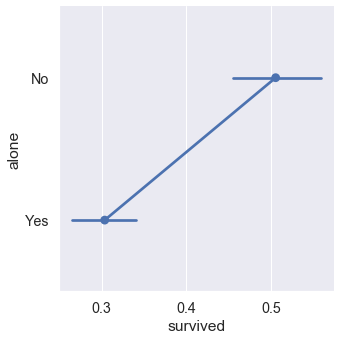

In [47]:
sns.factorplot('survived','alone',data=data)

In [48]:
data['familysize'] = data['sibsp'] + data['parch'] + 1
data[['familysize','survived']].groupby('familysize').mean()

survived
familysize          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000

People who were with their families had a higher survival rate compared to the people who boarded the ship alone.

NOTE: The reason for adding one to the "data[familysize]" is that, the size of the family will be zero if the person boarded the train alone and also take to take the count of the person

**ANALYSIS OF FARE TICKET AND IMAPCT OF ITS SURVIVAL**

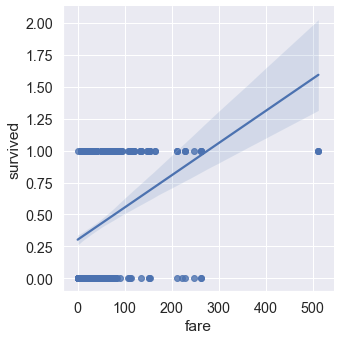

In [49]:
sns.lmplot('fare','survived',data=data)

Passengers with cheaper ticket fares are more likely to die. Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

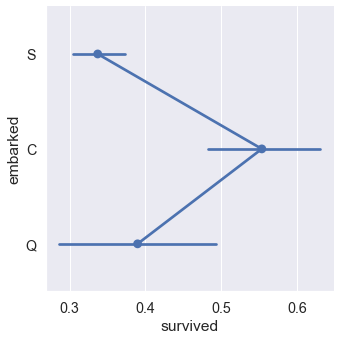

In [50]:
sns.factorplot('survived','embarked',data=data)

In [51]:
data[['embarked','survived']].groupby('embarked').mean()

survived
embarked          
C         0.553571
Q         0.389610
S         0.336957

From the previous analysis, we can see that first class passengers were dominanting that port. So, the survivability is higher for the people who embarked on Cherbourg.

(-1, 81.0)

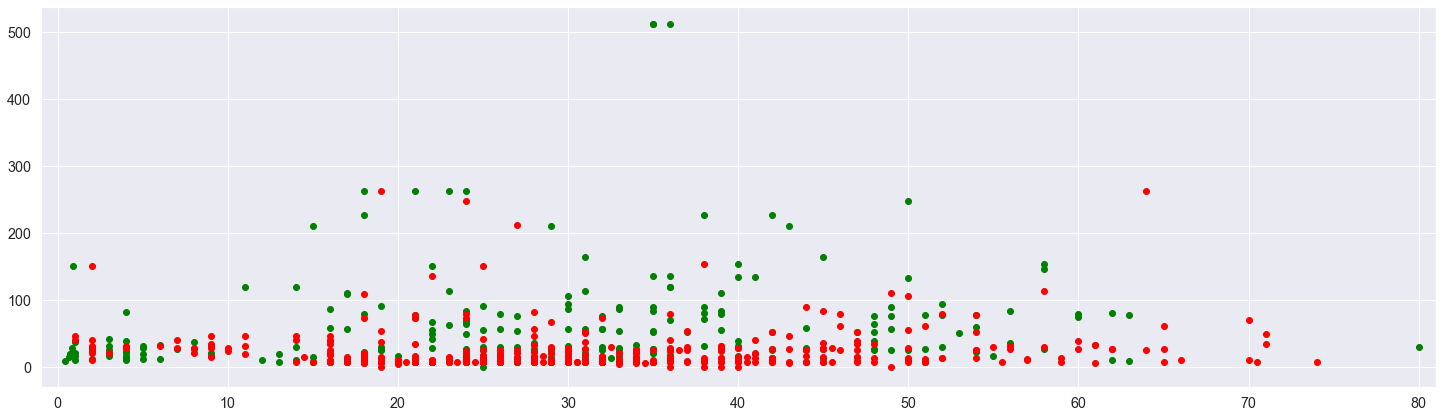

In [52]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['survived'] == 1]['age'], data[data['survived'] == 1]['fare'], 
           c='green')
ax.scatter(data[data['survived'] == 0]['age'], data[data['survived'] == 0]['fare'], 
           c='red');
ax.set_xlim(-1, data.age.max()+1)

x-axis -> Ages y-axis -> Ticket Fare

Analysis result: Those who survived are younger people and people with high fares.

**Analysing the name feature and survived**

survived
title            
Master.  0.575000
Miss.    0.702703
Mr.      0.156673
Mrs.     0.793651
Rare     0.347826

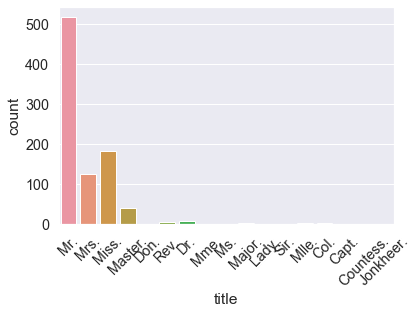

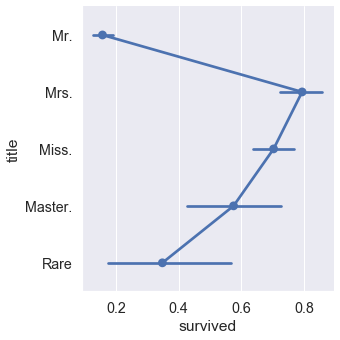

In [55]:
import re
data['title'] = data['name'].apply(lambda x: re.search('([A-Za-z]+)\.', x).group(0))
sns.countplot(x='title', data=data);
plt.xticks(rotation=45);
# Create a list with the most popular name's prefix
l                = ['Miss.','Master.','Mr.','Mrs.']
data['title'] = data['name'].apply(lambda x: re.search('([A-Za-z]+)\.', x).group(0))
data['title'] = data['title'].replace('Mlle.', 'Miss.')
data['title'] = data['title'].replace('Ms.', 'Miss.')
data['title'] = data['title'].replace('Mme.', 'Mrs.')
data['title'] = data['title'].apply(lambda x: 'Rare' if x not in l else x)  

sns.factorplot('survived','title',data=data)
data[['title', 'survived']].groupby('title').mean()

Mr. which categorises men has a low survival rate while Mrs. and Miss. which categorises women has a high survival rate.

In [ ]:
**